In [46]:
import cdflib
cdfName = 'data/spw/ak_h1_pws_spw_20150106_094427_h3_v01.cdf'
xry = cdflib.cdf_to_xarray(cdfName)
xry

<xarray.Dataset>
Dimensions:    (Epoch: 512, Frequency: 512, Delay: 128)
Coordinates:
  * Epoch      (Epoch) float64 6.359e+13 6.359e+13 ... 6.359e+13 6.359e+13
  * Frequency  (Frequency) float32 1.14e+07 1.134e+07 ... 3.075e+05 3.038e+05
  * Delay      (Delay) float32 0.0 0.000244 0.000488 ... 0.0305 0.03074 0.03099
Data variables:
    Gain       (Epoch) int8 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0
    Height     (Epoch) float32 3.439e+06 3.439e+06 ... 3.466e+06 3.466e+06
    GMLat      (Epoch) float32 3.92 3.918 3.916 3.914 ... 2.894 2.892 2.89 2.888
    GMLT       (Epoch) float32 18.07 18.07 18.07 18.07 ... 18.1 18.1 18.1 18.1
    Lat        (Epoch) float32 13.66 13.66 13.65 13.65 ... 12.62 12.62 12.62
    Lon        (Epoch) float32 122.5 122.5 122.5 122.5 ... 122.7 122.7 122.7
    Fce        (Epoch) float32 2.778e+05 2.777e+05 ... 2.742e+05 2.742e+05
    RX         (Frequency, Delay) int8 75 50 50 50 50 50 ... 55 70 55 55 55 55
Attributes: (12/24)
    Project:                     ISTP>International Solar-Terrestrial Physics
    Source_name:                 Akebono > Akebono spacecraft
    Discipline:                  Space Physics>Magnetospheric Science
    Data_type:                   H1 > High Resolution data
    Descriptor:                  PWS > Plasma Waves and Sounder
    Data_version:                1
    ...                          ...
    MODS:                         
    Rules_of_use:                 In order to confirm the reliability of the ...
    Time_resolution:             32s
    TITLE:                       Akebono PWS Sounder data
    Start time:                  06-Jan-2015 09:44:27.931
    End time:                    06-Jan-2015 09:44:59.869

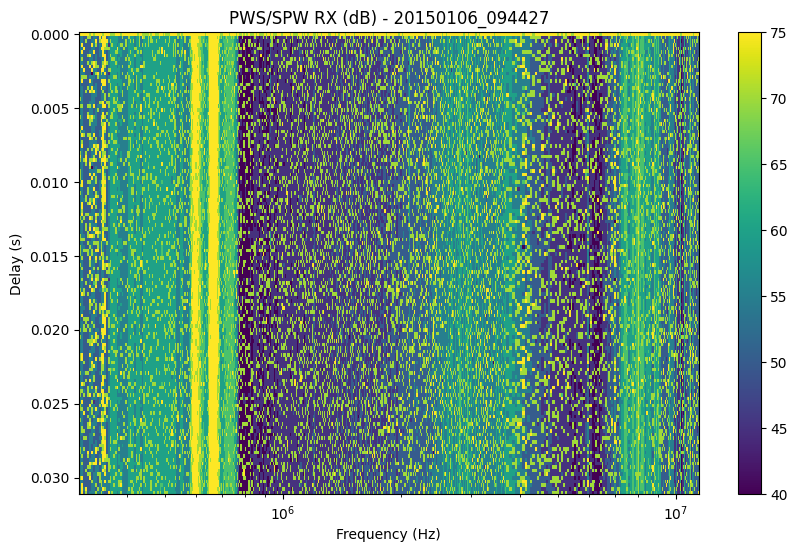

In [43]:
def plot_spw(cdfName):
    '''
    Args:
    cdfName: str, cdf file name, ak_h1_pws_spw_yyyymmdd_hhmmss_h3_v01.cdf
    '''
    import cdflib
    import matplotlib.pyplot as plt
    import os
    dataDir = 'data/spw/'
    xry = cdflib.cdf_to_xarray(dataDir+cdfName)
    time = cdfName.split('_')[4] + '_' + cdfName.split('_')[5]
    rx = xry['RX'].values
    # rxを転置
    rx = rx.T

    # plot
    horizontal_axis = xry['Frequency'].values
    vertical_axis = xry['Delay'].values

    color_array = rx

    # Create the plot
    plt.figure(figsize=(10,6))
    plt.pcolormesh(horizontal_axis, vertical_axis, color_array, cmap='viridis')

    # Set x-axis to logarithmic scale
    plt.xscale('log')

    # Invert y-axis
    plt.gca().invert_yaxis()

    # Adding labels and title for clarity
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Delay (s)')
    plt.title('PWS/SPW RX (dB) - '+time)
    plt.colorbar()  # to show the color scale

    os.makedirs('plots', exist_ok=True)
    plt.savefig('plots/'+time+'.png')

cdfName = 'ak_h1_pws_spw_20150106_094427_h3_v01.cdf'
plot_spw(cdfName)

Exception ignored in: <function CDF.__del__ at 0x7f3287294280>
Traceback (most recent call last):
  File "/home/www/Document/akebono_example/.venv/lib/python3.10/site-packages/cdflib/cdfread.py", line 181, in __del__
    self._f.close()
AttributeError: 'CDF' object has no attribute '_f'


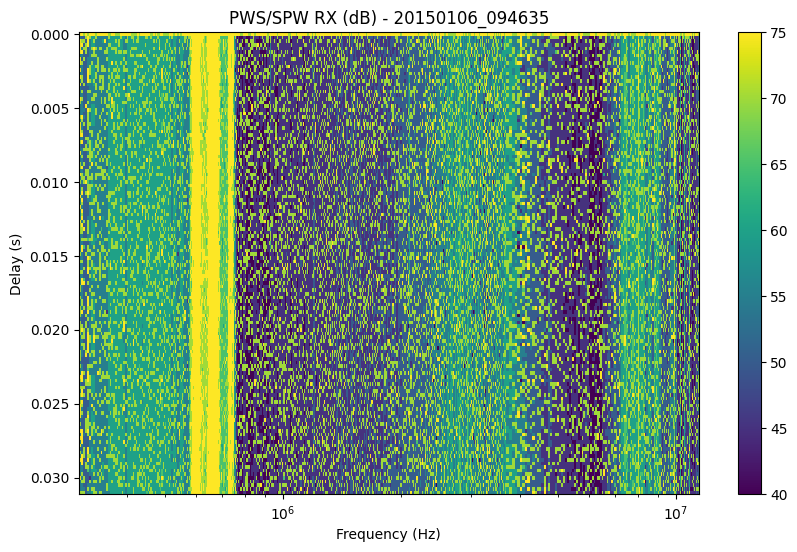

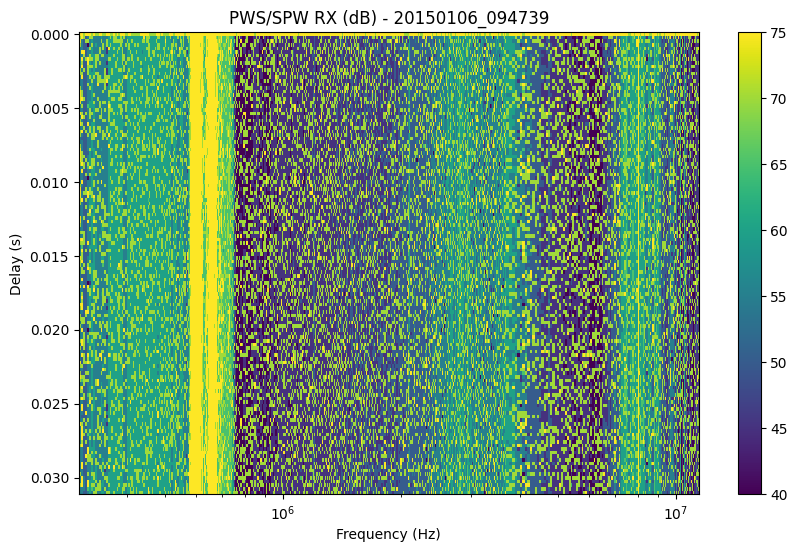

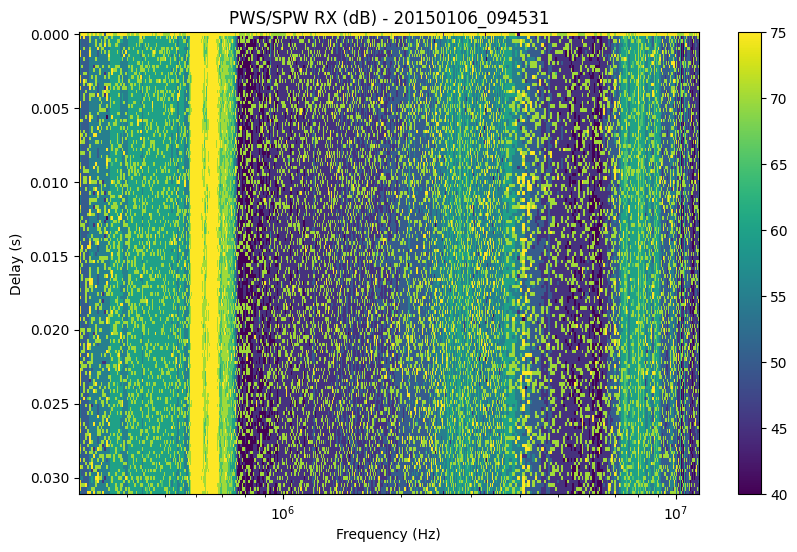

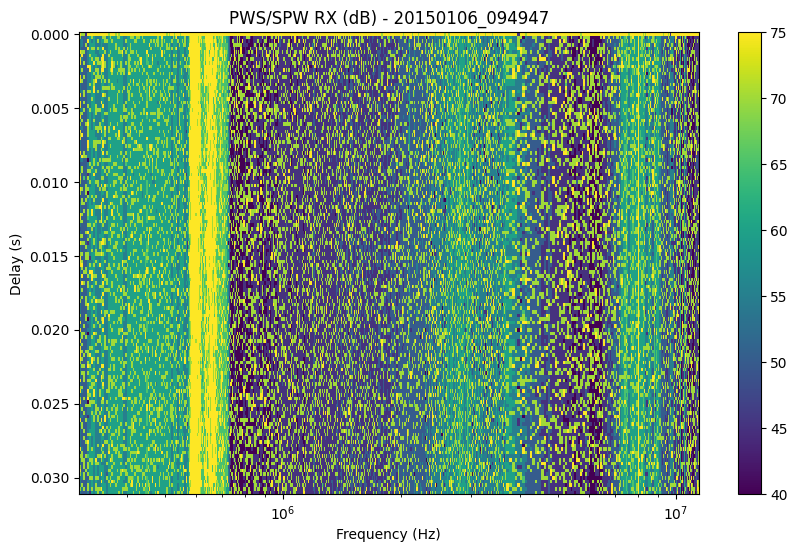

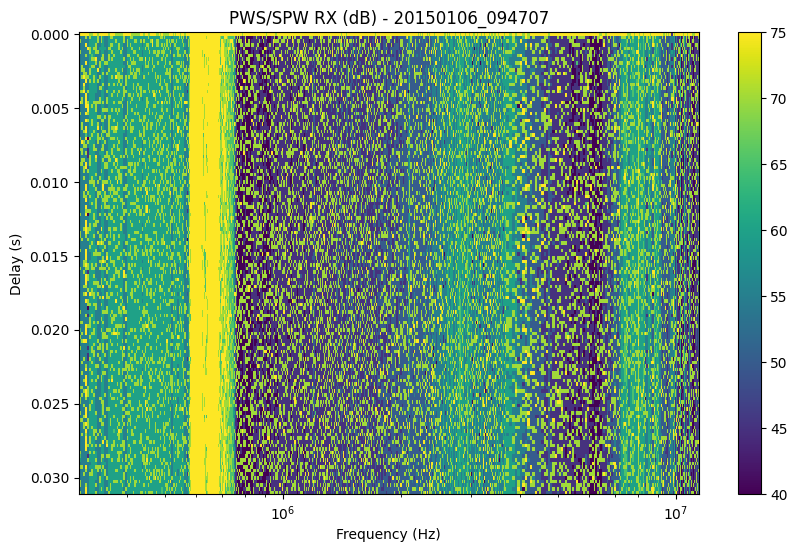

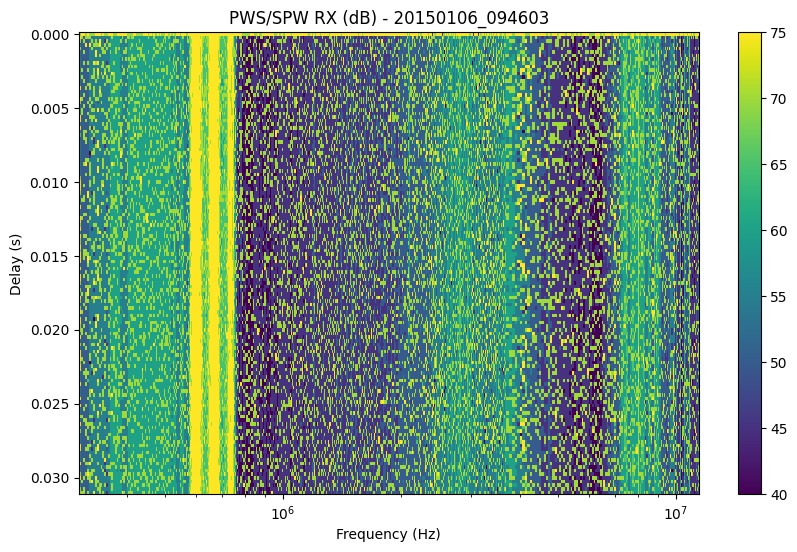

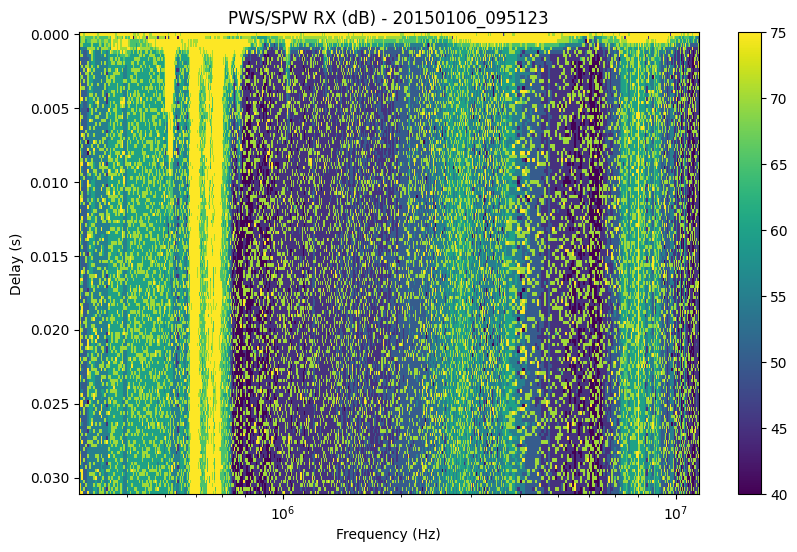

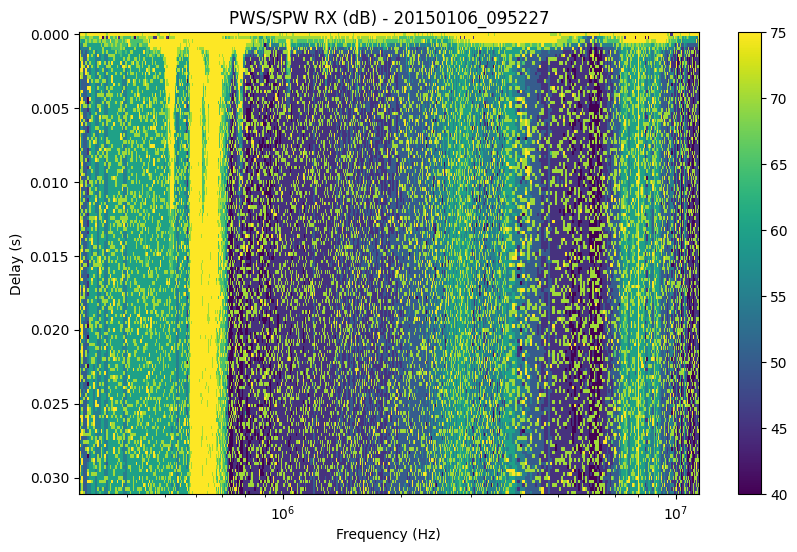

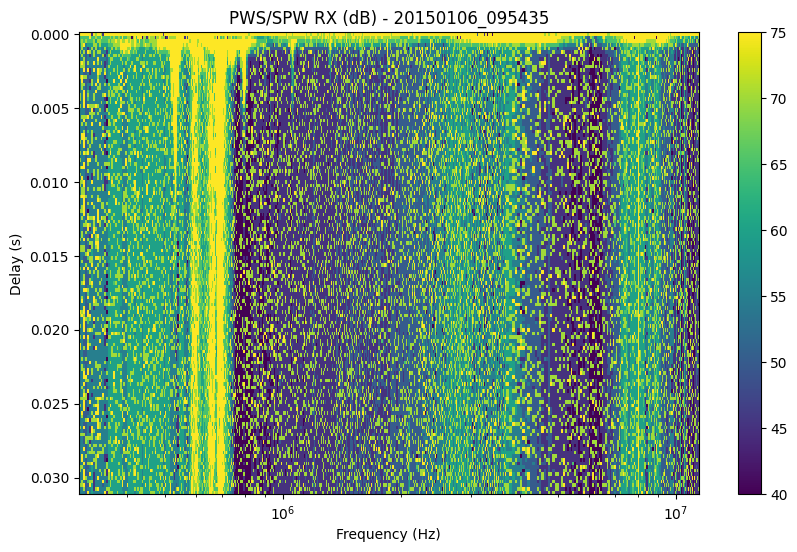

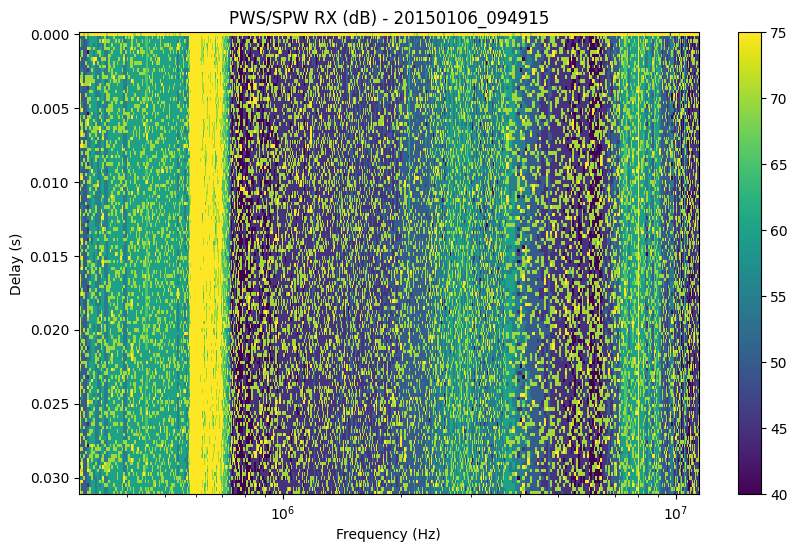

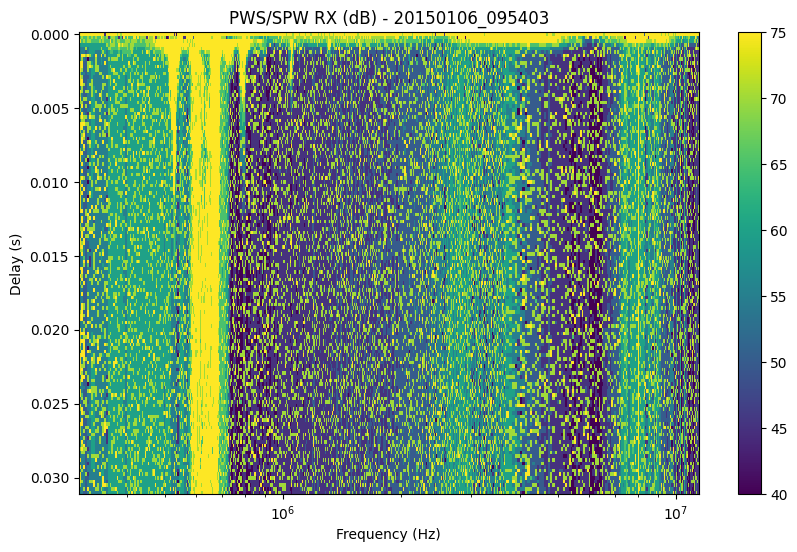

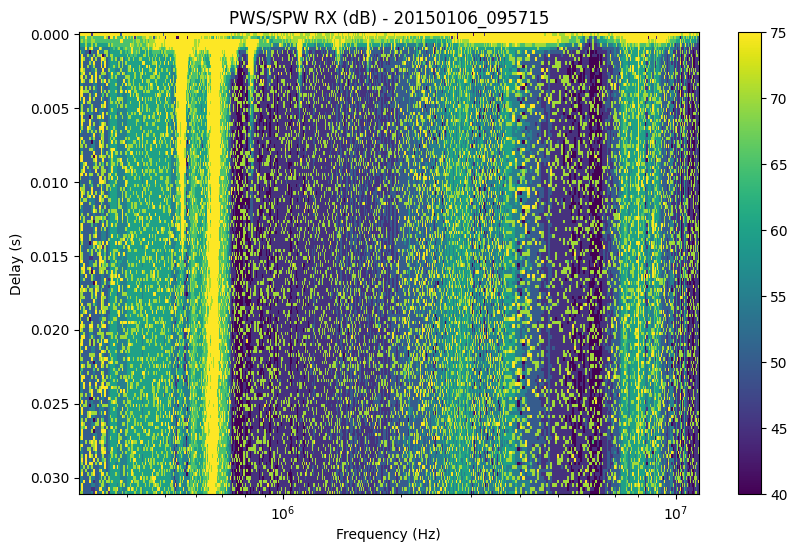

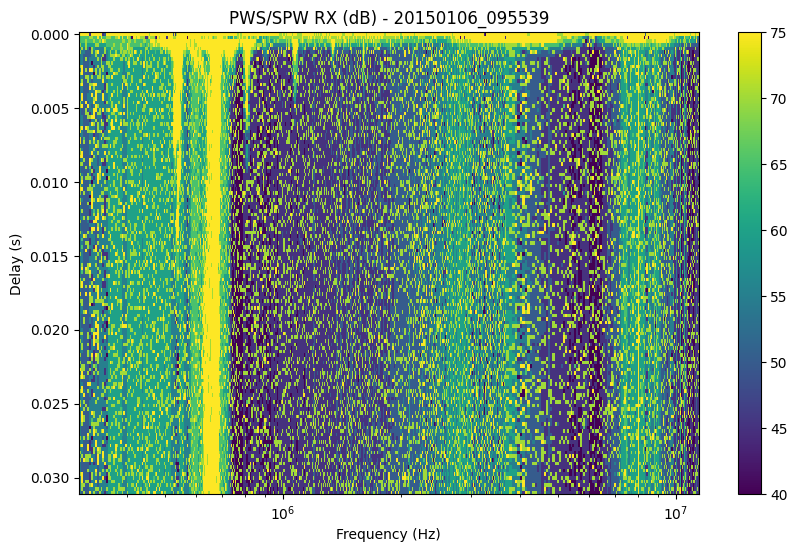

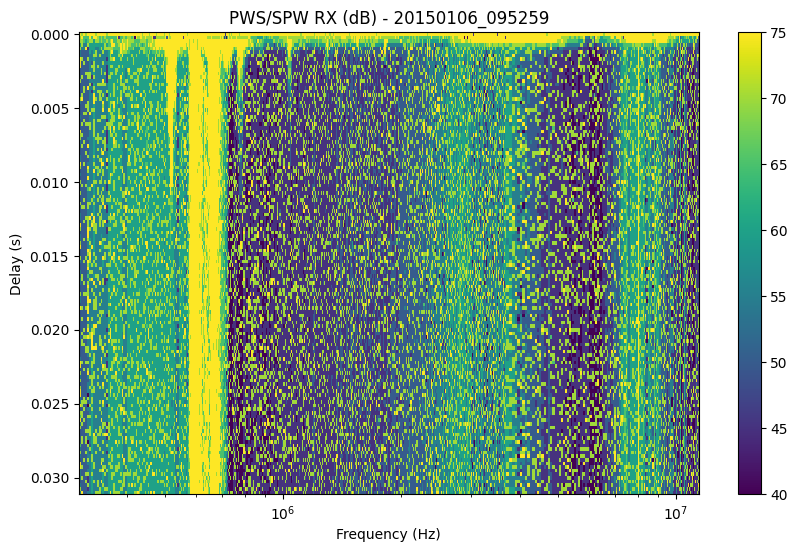

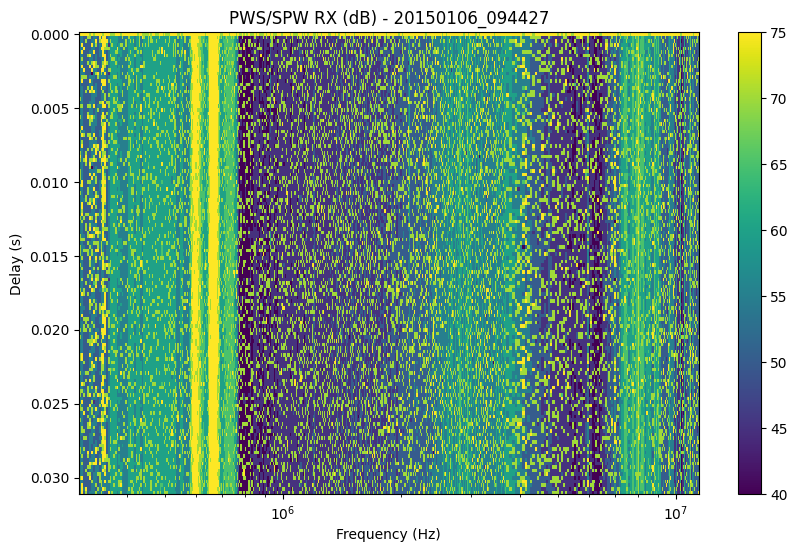

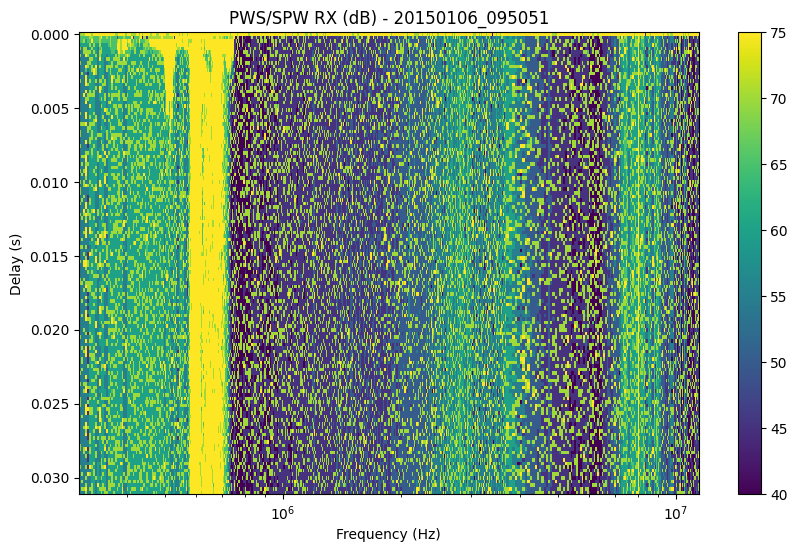

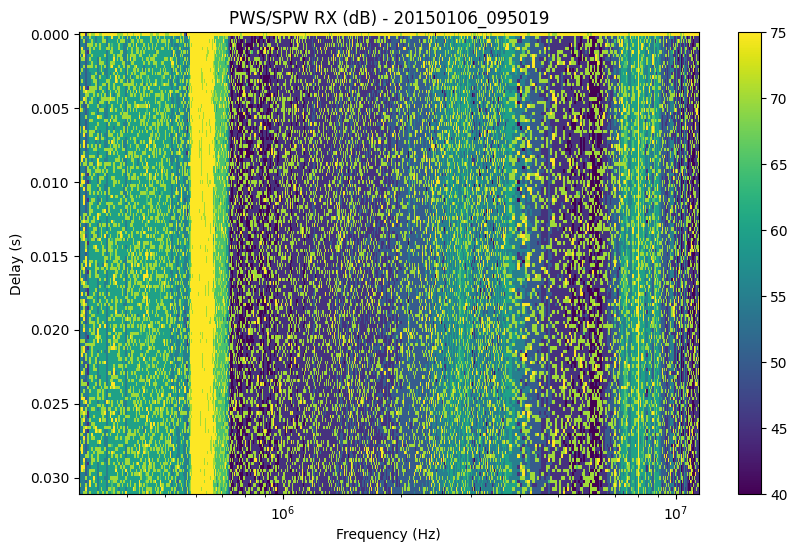

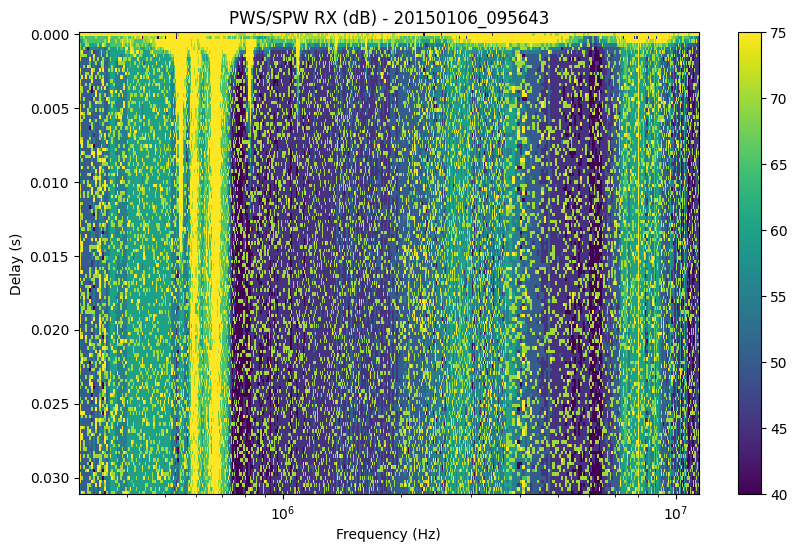

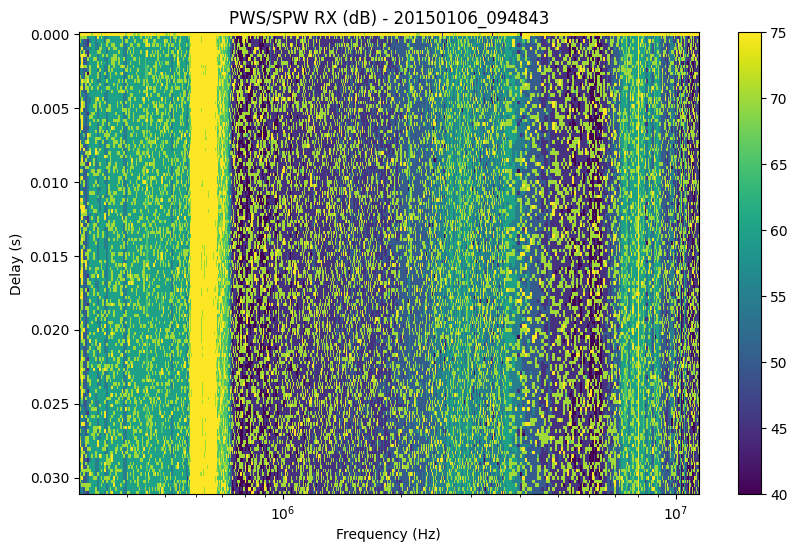

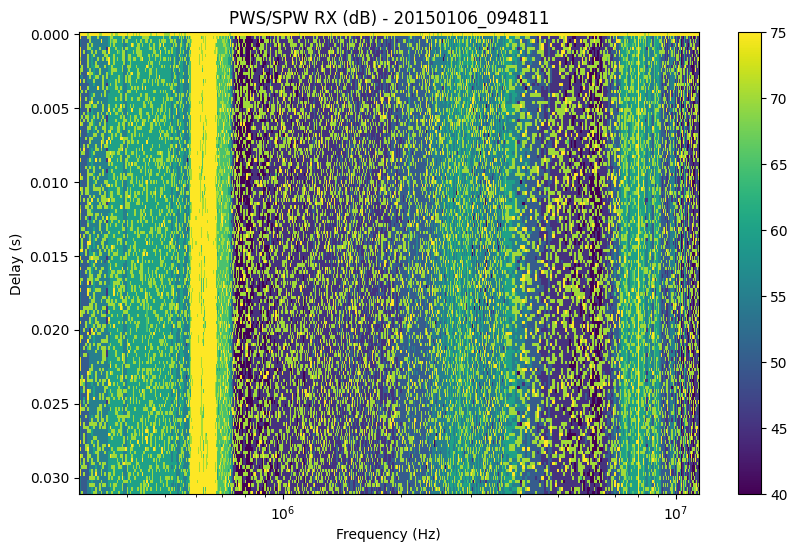

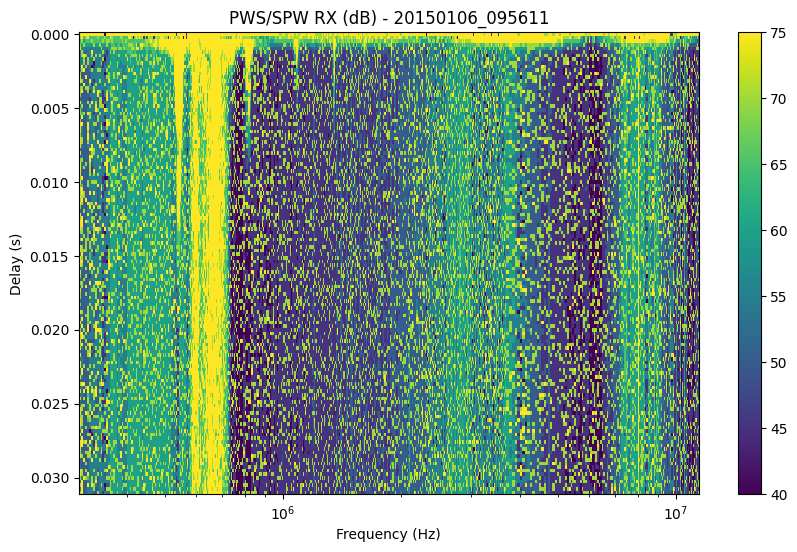

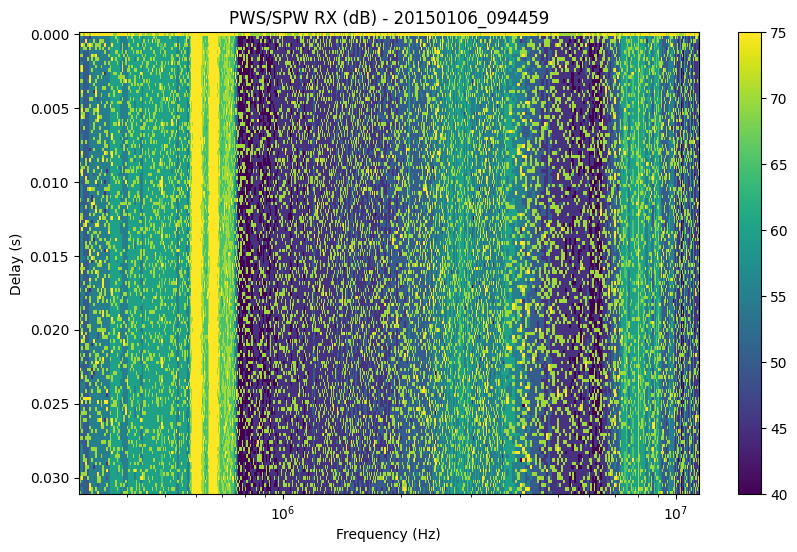

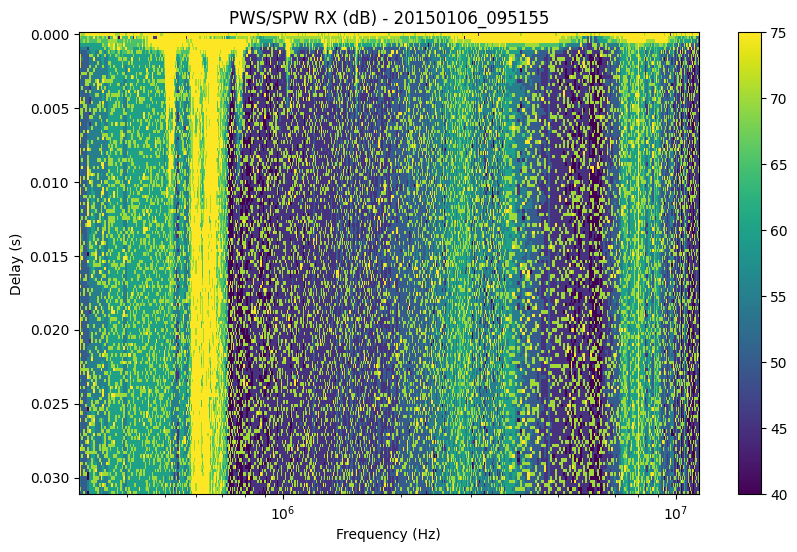

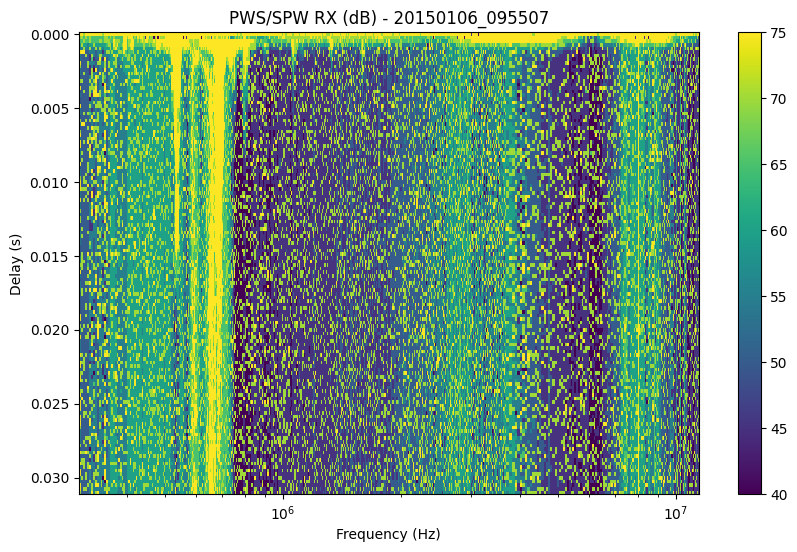

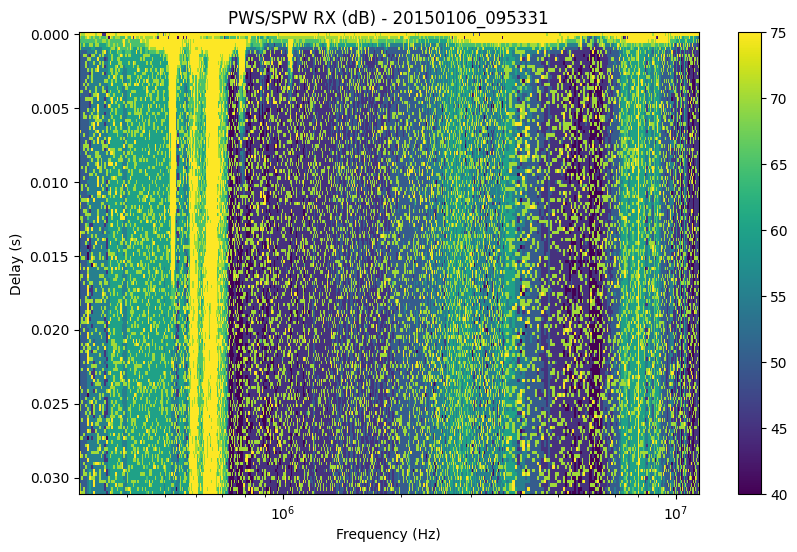

In [45]:
# data/spw/にある全てのファイルに対してplot_spwを実行
import os
import re
cdfList = os.listdir('data/spw/')
for cdfName in cdfList:
    if re.match(r'.*\.cdf', cdfName): # .cdfファイルのみ
        plot_spw(cdfName)